In [1]:
import json
from stereo_camera import *
import matplotlib.pyplot as plt

In [2]:
hflip = False
image_dir = './calibrate_images'

if (hflip):
    image_dir = image_dir + '_hflip'
    
image_filename = image_dir + '/test.jpg'
config_json_filename = image_dir + '/sbm_config.json'

calibration_data = np.load(image_dir + '/calibration_data.npz')
        
left_map_1 = calibration_data['left_map_1']
left_map_2 = calibration_data['left_map_2']
right_map_1 = calibration_data['right_map_1']
right_map_2 = calibration_data['right_map_2']
Q = calibration_data['Q']
print(Q)

with open(config_json_filename) as sbm_config_file:
    sbm_config = json.load(sbm_config_file)
sbm = create_SBM(sbm_config)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.47029350e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.22827165e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.20664173e+02]
 [ 0.00000000e+00  0.00000000e+00  1.53627651e-02 -0.00000000e+00]]


In [3]:
image_pair = cv2.imread(image_filename, cv2.IMREAD_COLOR)

In [4]:
_3dImage, disparity, _, _ = compute_3dImage(sbm, image_pair, left_map_1, left_map_2, right_map_1, right_map_2, Q, hflip)

In [5]:
_3dImage[140:145,125:130,2] # 0.75 m

array([[780.29224, 780.29224, 778.4734 , 778.4734 , 778.4734 ],
       [778.4734 , 778.4734 , 778.4734 , 778.4734 , 776.66296],
       [778.4734 , 778.4734 , 776.66296, 776.66296, 776.66296],
       [776.66296, 776.66296, 776.66296, 776.66296, 774.86096],
       [776.66296, 776.66296, 774.86096, 776.66296, 774.86096]],
      dtype=float32)

In [6]:
_3dImage[125:130,200:205,2] # 1.75 m

array([[1805.2166, 1805.2166, 1815.0276, 1815.0276, 1834.9729],
       [1805.2166, 1805.2166, 1815.0276, 1815.0276, 1824.9458],
       [1795.5111, 1805.2166, 1815.0276, 1815.0276, 1824.9458],
       [1795.5111, 1805.2166, 1815.0276, 1815.0276, 1824.9458],
       [1795.5111, 1805.2166, 1815.0276, 1815.0276, 1815.0276]],
      dtype=float32)

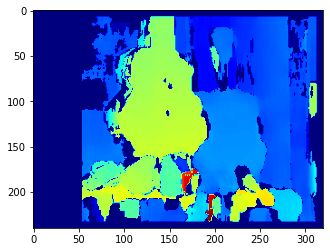

In [7]:
local_max = disparity.max()
local_min = disparity.min()
disparity_visual = (disparity-local_min)*(1.0/(local_max-local_min))
plt.imshow(disparity_visual, aspect='equal', cmap='jet')

In [8]:
left_camera_matrix = calibration_data['left_camera_matrix']
T = calibration_data['T']

f = left_camera_matrix[0,0]
b = -T[0]
print(f)
print(b)
safe_disparity = disparity
safe_disparity[safe_disparity == 0] = 0.1
safe_disparity[safe_disparity == -1] = 0.1

# Initialize the depth map to match the size of the disparity map
depth_map = np.ones(safe_disparity.shape, np.single)

# Calculate the depths 
depth_map[:] = f * b / safe_disparity[:]

322.0660138246936
[65.05085824]


In [9]:
depth_map[140:145,125:130] # 0.75 m

array([[783.20264, 783.20264, 781.377  , 781.377  , 781.377  ],
       [781.377  , 781.377  , 781.377  , 781.377  , 779.5598 ],
       [781.377  , 781.377  , 779.5598 , 779.5598 , 779.5598 ],
       [779.5598 , 779.5598 , 779.5598 , 779.5598 , 777.7511 ],
       [779.5598 , 779.5598 , 777.7511 , 779.5598 , 777.7511 ]],
      dtype=float32)

In [10]:
depth_map[125:130,200:205] # 1.75 m

array([[1811.95  , 1811.95  , 1821.7975, 1821.7975, 1841.8171],
       [1811.95  , 1811.95  , 1821.7975, 1821.7975, 1831.7526],
       [1802.2083, 1811.95  , 1821.7975, 1821.7975, 1831.7526],
       [1802.2083, 1811.95  , 1821.7975, 1821.7975, 1831.7526],
       [1802.2083, 1811.95  , 1821.7975, 1821.7975, 1821.7975]],
      dtype=float32)